In [96]:
import infomap
import graphviz
import networkx as nx
from IPython.display import display, Image, Latex, SVG, HTML

In [107]:
# Load Network
rGfile_gpickle = 'results/net_complete_mlayer_modules.gpickle'
G = nx.read_gpickle(rGfile_gpickle)

In [8]:
def get_network_layer(G, layer=''):
    return G.subgraph([n for n, d in G.nodes(data=True) if (d.get('layer') == 'DM')]).copy()

#Separate Layers
HSG = get_network_layer(G, 'HS')
MMG = get_network_layer(G, 'MM')
DMG = get_network_layer(G, 'DM')

In [108]:
myInfomap = infomap.Infomap("--silent --seed 123")
# Map node-id to integer
dict_node_to = {n: i for i, n in enumerate(G.nodes(), start=1)}
dict_node_from = {i: n for n, i in dict_node_to.items()}
# Map layer-id to integer
dict_layer_to = {'HS': 0, 'MM': 1, 'DM': 2}
# dict_layer_from = {i: n for n, i in dict_layer_to.items()}
#
for i, j, d in G.edges(data=True):
    weight = d.get('weight', 0.5)
    il = G.nodes[i]['layer']
    jl = G.nodes[j]['layer']
    # Map Translation
    it = dict_node_to[i]
    jt = dict_node_to[j]
    ilt = dict_layer_to[il]
    jlt = dict_layer_to[jl]
    # from (layer, node) to (layer, node) weight
    myInfomap.addMultilayerLink(ilt, it, jlt, jt, weight)
# Run!
myInfomap.run()
# Debug print
print("Found {modules:d} modules with codelength: {codelength:.4f}".format(modules=myInfomap.numTopModules(), codelength=myInfomap.codelength()))

Found 8 modules with codelength: 12.9072


In [109]:
# Dict of Results
#dict_modules = myInfomap.getModules()
# translate nodes
#dict_modules_translated = {dict_node_from[k]: v for k, v in dict_modules.items()}
maxDepth = myInfomap.maxTreeDepth()
print("MaxDepth: {:d}".format(maxDepth))

print(f"Found {maxDepth} levels with {myInfomap.numTopModules()} top modules and codelength: {myInfomap.codelength()}")

#for moduleLevel in range(1, maxDepth):
#    print(f"Modules at level {moduleLevel}: {myInfomap.getModules(moduleLevel).values()}")

print("Tree:\n# path flow [physicalId]")
for node in myInfomap.iterTree():
    if node.isLeaf():
        print("{}: {} {}".format(node.path(), node.data.flow, node.physicalId))
    else:
        print("{}: {}".format(node.path(), node.data.flow))

asd
allModules = myInfomap.getMultilevelModules()
print("\nModules at all levels:")
for nodeId, modules in myInfomap.getMultilevelModules().items():
    print(f"{nodeId}: {modules}")

MaxDepth: 4
Found 4 levels with 8 top modules and codelength: 12.907150631475341
Tree:
# path flow [physicalId]
(): 1.0000000000021023
(0,): 0.7874067957294864
(0, 0): 0.4139245447479206
(0, 0, 0): 0.17508982378619656
(0, 0, 0, 0): 1.7180867001521918e-05 1
(0, 0, 0, 1): 4.0627103109370674e-05 459
(0, 0, 0, 2): 6.579407946532297e-05 508
(0, 0, 0, 3): 1.0981408602372745e-05 831
(0, 0, 0, 4): 5.030934319461416e-05 2238
(0, 0, 0, 5): 1.1461615183238844e-05 2241
(0, 0, 0, 6): 2.041905148533016e-05 2271
(0, 0, 0, 7): 4.947818349760715e-05 2304
(0, 0, 0, 8): 4.3000316559372955e-05 2364
(0, 0, 0, 9): 9.63122348592156e-05 2947
(0, 0, 0, 10): 3.5956644719262636e-05 3004
(0, 0, 0, 11): 1.7877209342938267e-05 3109
(0, 0, 0, 12): 9.211128325984707e-05 3910
(0, 0, 0, 13): 1.7080716965940216e-05 4087
(0, 0, 0, 14): 2.631484984069635e-05 1715
(0, 0, 0, 15): 3.261231831740201e-05 4613
(0, 0, 0, 16): 5.9792353187706965e-05 1001
(0, 0, 0, 17): 1.4495647671438244e-05 4859
(0, 0, 0, 18): 3.2327917895846323

(0, 0, 0, 2592): 6.206306264829965e-06 9004
(0, 0, 0, 2593): 3.985308029163776e-05 6879
(0, 0, 0, 2594): 3.44462623450412e-05 1047
(0, 0, 0, 2595): 2.221233631048965e-05 10848
(0, 0, 0, 2596): 1.3055883912050068e-05 11919
(0, 0, 0, 2597): 3.279121880831287e-05 2604
(0, 0, 0, 2598): 1.642439183959605e-05 5728
(0, 0, 0, 2599): 2.9809187300127043e-05 11125
(0, 0, 0, 2600): 8.424372758001563e-06 11938
(0, 0, 0, 2601): 2.6458013032585593e-05 12124
(0, 0, 0, 2602): 3.077730431075015e-05 4266
(0, 0, 0, 2603): 4.2875984998105885e-05 6942
(0, 0, 0, 2604): 1.6995118644930207e-05 7047
(0, 0, 0, 2605): 4.2122505777415434e-05 6916
(0, 0, 0, 2606): 4.710069013155449e-05 6497
(0, 0, 0, 2607): 1.962619703697505e-05 11416
(0, 0, 0, 2608): 3.209423447948894e-05 10622
(0, 0, 0, 2609): 4.0878120185732545e-05 9540
(0, 0, 0, 2610): 3.7852647529634136e-05 5061
(0, 0, 0, 2611): 4.7918154097199794e-05 11505
(0, 0, 0, 2612): 3.1519441753906818e-06 10130
(0, 0, 0, 2613): 2.174710943580033e-05 2641
(0, 0, 0, 2614

(0, 0, 0, 5501): 8.17934756411044e-06 9772
(0, 0, 0, 5502): 6.513390241453334e-06 12081
(0, 0, 0, 5503): 3.2332625803501806e-06 3637
(0, 0, 0, 5504): 2.3633482435058183e-05 3070
(0, 0, 0, 5505): 1.209654072933052e-05 10494
(0, 0, 0, 5506): 1.708542487359577e-06 11843
(0, 0, 0, 5507): 9.19240369326378e-06 6814
(0, 0, 0, 5508): 4.316723328534241e-06 7758
(0, 0, 0, 5509): 1.2435724076332635e-05 5755
(0, 0, 0, 5510): 9.601135676086533e-06 7133
(0, 0, 0, 5511): 3.0524361272165584e-06 1868
(0, 0, 0, 5512): 8.840380598110155e-06 3905
(0, 0, 0, 5513): 4.293397786059017e-06 9853
(0, 0, 0, 5514): 1.4818353341645942e-05 350
(0, 0, 0, 5515): 6.63344188666986e-06 10725
(0, 0, 0, 5516): 7.787949241292219e-06 11814
(0, 0, 0, 5517): 3.899003522005448e-06 5067
(0, 0, 0, 5518): 7.5608996948131955e-06 4533
(0, 0, 0, 5519): 1.3629392662817065e-06 11394
(0, 0, 0, 5520): 7.034256024799182e-06 12041
(0, 0, 0, 5521): 5.432069451294526e-06 10745
(0, 0, 0, 5522): 3.442122483614579e-06 12572
(0, 0, 0, 5523): 5.4

(0, 0, 2, 1077): 6.359848253141643e-05 5968
(0, 0, 2, 1078): 9.02204163487363e-05 6037
(0, 0, 2, 1079): 3.676704682342483e-05 6508
(0, 0, 2, 1080): 0.00010429406429759523 6662
(0, 0, 2, 1081): 0.00014895905420480982 6883
(0, 0, 2, 1082): 0.0001237268091290876 6979
(0, 0, 2, 1083): 6.549106140894755e-05 608
(0, 0, 2, 1084): 5.247776266159995e-05 8200
(0, 0, 2, 1085): 6.401085244288217e-05 8279
(0, 0, 2, 1086): 7.137337802875473e-05 8284
(0, 0, 2, 1087): 0.00010372997136213937 8363
(0, 0, 2, 1088): 8.036334169282977e-05 738
(0, 0, 2, 1089): 3.839897881348045e-05 9450
(0, 0, 2, 1090): 6.649919563464279e-05 6348
(0, 0, 2, 1091): 0.00010282519710906372 9605
(0, 0, 2, 1092): 7.035240405490799e-05 9592
(0, 0, 2, 1093): 0.00010475073134018368 9907
(0, 0, 2, 1094): 3.441459096626754e-05 9854
(0, 0, 2, 1095): 4.534271461381143e-05 10492
(0, 0, 2, 1096): 0.00011761337704255358 3876
(0, 0, 2, 1097): 3.4180907549910204e-05 3655
(0, 0, 2, 1098): 2.377022575287163e-05 3247
(0, 0, 2, 1099): 6.42364040

(0, 0, 8, 849): 3.476747004463125e-05 956
(0, 0, 8, 850): 2.5778362363766197e-05 8976
(0, 0, 8, 851): 2.7215344177721577e-05 1243
(0, 0, 8, 852): 4.580066563121507e-05 5676
(0, 0, 8, 853): 2.1979080885737392e-05 7050
(0, 0, 8, 854): 3.0153720542192285e-05 9584
(0, 0, 8, 855): 5.019442744865826e-05 1955
(0, 0, 8, 856): 4.9390231222769325e-05 11320
(0, 0, 8, 857): 4.314626169669491e-05 7007
(0, 0, 8, 858): 4.5737322873667634e-05 11463
(0, 0, 8, 859): 3.5721249336485146e-05 3494
(0, 0, 8, 860): 4.031017532583117e-05 2106
(0, 0, 8, 861): 1.1634737787481574e-05 5152
(0, 0, 8, 862): 2.687616083071945e-05 7055
(0, 0, 8, 863): 2.8586843276104267e-05 4238
(0, 0, 8, 864): 1.7120306189407364e-05 10436
(0, 0, 8, 865): 2.8896067210752906e-05 6058
(0, 0, 8, 866): 2.6572714782739032e-05 6500
(0, 0, 8, 867): 1.7555787647545714e-05 5180
(0, 0, 8, 868): 4.542617297679632e-05 1004
(0, 0, 8, 869): 6.077780385833454e-05 12289
(0, 0, 8, 870): 3.186953888683769e-05 9693
(0, 0, 8, 871): 2.2549593695269078e-05

(0, 1, 3, 79): 2.1663223081210513e-05 19411
(0, 1, 3, 80): 2.0457356733982128e-05 18507
(0, 1, 3, 81): 5.328431284131664e-05 16939
(0, 1, 3, 82): 1.5354626822773593e-05 20756
(0, 1, 3, 83): 9.918491451231096e-06 14569
(0, 1, 3, 84): 7.700424958059504e-06 24918
(0, 1, 3, 85): 6.711550354591489e-06 25055
(0, 1, 3, 86): 4.0283211854713e-05 17871
(0, 1, 3, 87): 7.032822252922257e-05 19343
(0, 1, 3, 88): 2.322860237668088e-05 13023
(0, 1, 3, 89): 4.053936483033545e-05 24568
(0, 1, 3, 90): 3.4478575711222473e-05 15711
(0, 1, 3, 91): 2.2711802513583e-05 23328
(0, 1, 3, 92): 3.426522189610507e-05 19185
(0, 1, 3, 93): 1.7529894155440185e-05 14521
(0, 1, 3, 94): 2.8904199051248835e-05 14768
(0, 1, 3, 95): 2.503237299616407e-05 15256
(0, 1, 3, 96): 2.5090151862845817e-05 21116
(0, 1, 3, 97): 2.1051195085989012e-05 13707
(0, 1, 3, 98): 2.550401974492918e-05 23395
(0, 1, 3, 99): 1.0818771792453752e-05 22294
(0, 1, 3, 100): 3.839598287224504e-05 13667
(0, 1, 3, 101): 1.7196274699303732e-05 18670
(0,

(0, 1, 3, 3159): 3.107540046366747e-05 16365
(0, 1, 3, 3160): 4.655371686030046e-05 17071
(0, 1, 3, 3161): 5.27058821870916e-05 23050
(0, 1, 3, 3162): 1.1059089078689326e-05 20372
(0, 1, 3, 3163): 7.515746580480425e-06 19877
(0, 1, 3, 3164): 3.79185582368118e-05 24204
(0, 1, 3, 3165): 5.570460536787446e-05 20972
(0, 1, 3, 3166): 1.042865744445069e-05 18950
(0, 1, 3, 3167): 1.049349817261576e-05 20109
(0, 1, 3, 3168): 2.9746700525789743e-05 22056
(0, 1, 3, 3169): 7.623600464953023e-06 16662
(0, 1, 3, 3170): 3.532706906823414e-05 18533
(0, 1, 3, 3171): 9.129488927321417e-06 23797
(0, 1, 3, 3172): 5.350965042137554e-06 19637
(0, 1, 3, 3173): 2.3998345278363273e-05 19016
(0, 1, 3, 3174): 4.284195966550441e-06 13022
(0, 1, 3, 3175): 3.6795508265160587e-05 19004
(0, 1, 3, 3176): 2.4663872224216028e-05 21705
(0, 1, 3, 3177): 1.9614855259441233e-06 20680
(0, 1, 3, 3178): 5.054366859837909e-06 23166
(0, 1, 3, 3179): 1.0413463742471409e-05 20813
(0, 1, 3, 3180): 3.51220610894151e-05 16220
(0, 1,

(0, 1, 4, 553): 3.8706918773313965e-05 20937
(0, 1, 4, 554): 4.9533822406263636e-05 15441
(0, 1, 4, 555): 1.701095433431708e-05 14388
(0, 1, 4, 556): 5.129029995338876e-05 21381
(0, 1, 4, 557): 6.154690477260941e-05 23697
(0, 1, 4, 558): 4.332216624637046e-05 15600
(0, 1, 4, 559): 1.1817490202837927e-05 24597
(0, 1, 4, 560): 4.3281079052285735e-05 21135
(0, 1, 4, 561): 5.2967599053579694e-05 18664
(0, 1, 4, 562): 7.948296296124206e-05 22724
(0, 1, 4, 563): 5.1231023116089336e-05 13060
(0, 1, 4, 564): 9.59841792939444e-05 17922
(0, 1, 4, 565): 5.059160365814471e-05 17538
(0, 1, 4, 566): 7.142388103815039e-05 20192
(0, 1, 4, 567): 6.876819312881538e-05 13512
(0, 1, 4, 568): 5.332347407317878e-06 21261
(0, 1, 4, 569): 0.00011502317184879069 17098
(0, 1, 4, 570): 6.818441257952714e-05 13118
(0, 1, 4, 571): 2.0967094735596708e-05 15685
(0, 1, 4, 572): 5.570952727133248e-06 20381
(0, 1, 4, 573): 3.229945645411045e-05 22632
(0, 1, 4, 574): 4.1013365532928316e-05 20073
(0, 1, 4, 575): 2.014920

(0, 1, 9, 708): 3.895386992942775e-05 16595
(0, 1, 9, 709): 4.77585132285162e-05 16949
(0, 1, 9, 710): 3.600757572026359e-05 17533
(0, 1, 9, 711): 1.2938828208068902e-05 13643
(0, 1, 9, 712): 4.214925525273102e-05 13323
(0, 1, 9, 713): 2.9941222710284974e-05 14959
(0, 1, 9, 714): 3.08337992026167e-05 14957
(0, 1, 9, 715): 2.746293732124299e-05 16229
(0, 1, 9, 716): 6.982255044785606e-06 16314
(0, 1, 9, 717): 1.6074080710862624e-05 23586
(0, 1, 9, 718): 1.548259631268354e-06 21129
(0, 1, 9, 719): 3.5698565781417474e-05 16312
(0, 1, 9, 720): 1.4781332067809136e-05 14220
(0, 1, 9, 721): 3.3218568425955292e-06 22621
(0, 1, 9, 722): 3.603475318718423e-05 15788
(0, 1, 9, 723): 5.9039943946029037e-05 15287
(0, 1, 9, 724): 1.6455635226764707e-05 22325
(0, 1, 9, 725): 1.546333669045629e-05 16550
(0, 1, 9, 726): 1.237280931039029e-05 17370
(0, 1, 9, 727): 3.004929059056012e-05 15037
(0, 1, 9, 728): 1.4954454672051847e-05 21472
(0, 1, 9, 729): 1.578261842782359e-05 17057
(0, 1, 9, 730): 0.0001284

(1, 3, 400): 5.567764189675624e-05 26221
(1, 3, 401): 2.3017816511193764e-05 26538
(1, 3, 402): 7.349043850313449e-06 26643
(1, 3, 403): 3.6218789577355755e-06 28350
(1, 3, 404): 3.6238691186990585e-05 33749
(1, 3, 405): 2.294270398450746e-05 31837
(1, 3, 406): 2.350016305008511e-05 31933
(1, 3, 407): 5.760125016565345e-06 28657
(1, 3, 408): 1.5215743546934866e-05 33434
(1, 3, 409): 6.0057493987035404e-05 25798
(1, 3, 410): 6.926188144524055e-05 32403
(1, 3, 411): 2.112331167143996e-05 28746
(1, 3, 412): 6.482339450506968e-05 33805
(1, 3, 413): 1.9533750850284262e-05 26732
(1, 3, 414): 1.872998261600038e-05 32844
(1, 3, 415): 1.1223437855028523e-05 26621
(1, 3, 416): 2.788194110258693e-05 25898
(1, 3, 417): 4.142273950315866e-05 26733
(1, 3, 418): 1.2568615469700648e-05 32275
(1, 3, 419): 1.8776633700950826e-05 31440
(1, 3, 420): 1.600731402047482e-05 34502
(1, 3, 421): 5.506154798128678e-05 33502
(1, 3, 422): 2.0607795783157206e-05 32614
(1, 3, 423): 2.726477720810484e-05 29015
(1, 3,

(1, 7, 97): 3.3241893968430534e-05 26879
(1, 7, 98): 4.32301480512848e-05 31176
(1, 7, 99): 8.279925591297187e-06 27874
(1, 7, 100): 1.4269668103971852e-05 30241
(1, 7, 101): 9.552986620518399e-06 33756
(1, 7, 102): 5.6061978358091106e-05 34229
(1, 7, 103): 4.244264349799277e-05 29634
(1, 7, 104): 7.883327170477605e-05 30811
(1, 7, 105): 2.6560945013600142e-05 29597
(1, 7, 106): 2.4474699934783946e-05 31323
(1, 7, 107): 0.00016759081274745155 27377
(1, 7, 108): 4.2086554482591206e-05 30213
(1, 7, 109): 3.207197891602638e-05 33100
(1, 7, 110): 5.8124255907024576e-05 25621
(1, 7, 111): 0.00010101671858192496 33718
(1, 7, 112): 7.449814473722485e-05 34464
(1, 7, 113): 2.057184448833304e-05 26320
(1, 7, 114): 4.219462236286633e-05 30319
(1, 7, 115): 4.145248491970962e-05 28314
(1, 7, 116): 2.8870387714449907e-05 33787
(1, 7, 117): 3.890978679410762e-05 31429
(1, 7, 118): 5.950367285010071e-06 32375
(1, 7, 119): 1.1523459970168566e-05 29253
(1, 7, 120): 2.958919961513137e-05 29281
(1, 7, 12

(1, 15, 363): 5.8175186908025554e-05 34350
(1, 15, 364): 2.2991923019088215e-05 27016
(1, 15, 365): 1.3708143118146262e-05 31711
(1, 15, 366): 6.501492074832955e-05 27031
(1, 15, 367): 2.6674362788938382e-05 31546
(1, 15, 368): 3.434632630526203e-06 30998
(1, 15, 369): 2.4218974950766526e-05 34409
(1, 15, 370): 4.928665725434729e-05 30231
(1, 15, 371): 8.162292098649194e-05 33942
(1, 15, 372): 5.3968029430384266e-05 29926
(1, 15, 373): 9.067280347527404e-05 32631
(1, 15, 374): 4.2476240838989225e-05 26676
(1, 15, 375): 2.7198866500927133e-06 27927
(1, 15, 376): 4.908079329231819e-05 27898
(1, 15, 377): 4.402214651642979e-05 28549
(1, 15, 378): 2.3056549751450757e-05 28230
(1, 15, 379): 3.6068992515588267e-06 29989
(1, 15, 380): 1.1022067804852503e-05 33354
(1, 15, 381): 6.920774050720188e-05 32213
(1, 15, 382): 1.1160951080691216e-05 29760
(1, 15, 383): 6.638149794325424e-05 32640
(1, 15, 384): 3.250510642033697e-05 30248
(1, 15, 385): 6.893104393453668e-05 27609
(1, 15, 386): 4.039941

(1, 26, 218): 7.0978127781491045e-06 33393
(1, 26, 219): 1.892065287605015e-05 32910
(1, 26, 220): 3.0271846225186102e-06 33983
(1, 26, 221): 1.342395669239307e-06 32922
(1, 26, 222): 2.471651519163716e-06 33181
(1, 26, 223): 4.369794287560441e-07 33106
(1, 26, 224): 1.7611854547807263e-07 34483
(1, 26, 225): 2.3111546672699688e-07 34138
(1, 26, 226): 4.4190133221411904e-07 33600
(1, 26, 227): 1.711966420199977e-07 34092
(1, 26, 228): 2.877601556553637e-06 29156
(1, 26, 229): 2.9174047758232867e-06 29035
(1, 26, 230): 4.569024379711216e-06 31657
(1, 26, 231): 9.353756528367614e-06 32264
(1, 26, 232): 5.5732852813807665e-05 34608
(1, 26, 233): 1.252560231339312e-05 29947
(1, 26, 234): 6.879537059573605e-06 29788
(1, 26, 235): 6.569671137517411e-08 32339
(1, 26, 236): 9.627243163994578e-06 29074
(1, 26, 237): 2.918902746440961e-06 28033
(1, 26, 238): 3.556225045520908e-05 34018
(1, 26, 239): 2.4785635835852737e-05 32710
(1, 26, 240): 2.217638501566546e-06 27861
(1, 26, 241): 6.9097104677

NameError: name 'asd' is not defined

In [112]:
G.nodes[dict_node_from[34134]]

{'id_gene': 'FBgn0263022',
 'label': 'CG43317',
 'Middle_vs_Apical': True,
 'Basal_vs_Middle': True,
 'biotype': 'protein_coding',
 'core': False,
 'layer': 'DM',
 'modules-DM-louvain': 11,
 'modules-DM-infomap': 14,
 'modules-infomap': 80}

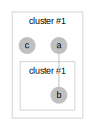

In [93]:
G = graphviz.Graph('G')
G.graph_attr.update(overlap='false', fontname='helvetica', color='lightgrey', fontcolor='black',fontsize='9')
G.node_attr.update(fontname='helvetica', shape='circle', fontcolor='black', fontsize='9', width='.2', fixedsize='true', style='filled', color='gray', penwidth='3')
G.edge_attr.update(arrowhead='dot', color='gray', arrowsize='1')

#
with G.subgraph(name='cluster_a') as a:
    #c.attr(style='filled', color='lightgrey')
    #c.node_attr.update(style='filled', color='white')
    a.node('a')
    a.node('c')
    a.attr(label='cluster #1')
    with a.subgraph(name='cluster_b') as b:
        b.node('b')
        
G.edges([('a','b')])

#

display(SVG(G.pipe(format='svg')))